In [18]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import optimize

# Deterministic

In [2]:
def SIR(v, t, beta, gamma):
    dSdt = -beta * v[0] * v[1]
    dIdt = beta * v[0] * v[1] - gamma * v[1]
    dRdt = gamma * v[1]
    return [dSdt, dIdt, dRdt]

In [8]:
def s_inf_func(x, rho, const):
    return rho * np.log(x) - x + const

In [4]:
def SIR_plot(S_0 = 999, I_0 = 1, R_0 = 0, t_max = 50, dt = 0.001, Nbeta = 1.5, gamma = 1):
  ini_state = [S_0,I_0,R_0] #[S[0], I[0], R[0]]
  N_total = S_0+I_0+R_0
  #numerical integration
  times = np.arange(0, t_max, dt)
  beta = Nbeta / N_total
  args  = (beta, gamma)

  #R0
  R0 = N_total * beta *(1/gamma)
  print("Reproduction Number: ", R0)

  result = odeint(SIR, ini_state, times, args)
  rho = gamma / beta
  const = I_0 + S_0 - rho * np.log(S_0)
  theo_I_max = - rho + rho * np.log(rho) + const
  theo_S_inf = optimize.fsolve(s_inf_func, 20, (rho, const))
  #plot
  plt.plot(times,result)
  plt.hlines(theo_I_max, 0, t_max, colors='orange', linestyle='dashed')
  plt.hlines(theo_S_inf, 0, t_max, colors='blue', linestyle='dashed')
  plt.legend(['Susceptible','Infectious', 'Recovered', "$max(I)$(Theoretical)", "$S_{\infty}$(Theoretical)"])

Reproduction Number:  1.5


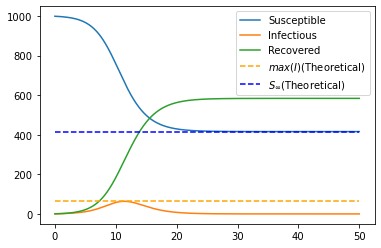

In [5]:
SIR_plot()

---

# Stochastic

In [3]:
tau = 1.5 / 1000
gamma = 1

In [4]:
def one_simulation():
    states = [[999, 1, 0]]
    ts = [0]
    t_max = 30
    t = 0
    state = states[-1]


    while t < t_max:
        state = states[-1]
        t = ts[-1]
        T = state[0] * state[1] * tau + state[1] * gamma
        t_next = random.expovariate(T)
        t = t + t_next
        if random.random() < state[1] * gamma / T:
            new_state = [state[0], state[1] - 1, state[2] + 1]
        else:
            new_state = [state[0] - 1, state[1] + 1, state[2]]
        if new_state[1] == 0:
            break
        ts.append(t)
        states.append(new_state)
    
    s = [state[0] for state in states]
    i = [state[1] for state in states]
    r = [state[2] for state in states]
    
    return s, i, r, ts

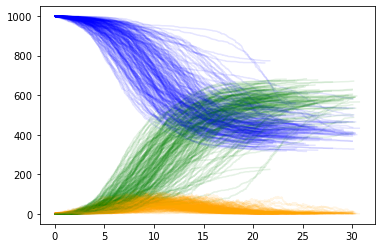

In [18]:
for j in range(1000):
    s, i, r, ts = one_simulation()
    if max(ts) > 20:
        plt.plot(ts, s, alpha = 0.1, color = "blue")
        plt.plot(ts, i, alpha = 0.1, color = "orange")
        plt.plot(ts, r, alpha = 0.1, color = "green")
        
plt.savefig("stochastic_sir")

In [15]:
S = []
I = []
R = []
ts = []

In [16]:
for j in range(10000):
    s, i, r, ts = one_simulation()
    S.append(s)
    I.append(i)
    R.append(r)
    ts.append(ts)
    print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075


3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951


5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850


7678
7679
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877


9341
9342
9343
9344
9345
9346
9347
9348
9349
9350
9351
9352
9353
9354
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477
9478
9479
9480
9481
9482
9483
9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
9540


In [22]:
pd.to_pickle(s, '../data/SIR/stochastic/S.pkl')
pd.to_pickle(i, '../data/SIR/stochastic/I.pkl')
pd.to_pickle(r, '../data/SIR/stochastic/R.pkl')
pd.to_pickle(ts, '../data/SIR/stochastic/time.pkl')

In [23]:
rho = gamma / tau
const = 1 + 999 - rho * np.log(999)
theo_I_max = - rho + rho * np.log(rho) + const
theo_S_inf = optimize.fsolve(s_inf_func, 20, (rho, const))[0]
theo_R_inf = 1000 - theo_S_inf

In [24]:
s_inf =[s[-1] for s in S]
r_inf = [r[-1] for r in R]

<BarContainer object of 80 artists>

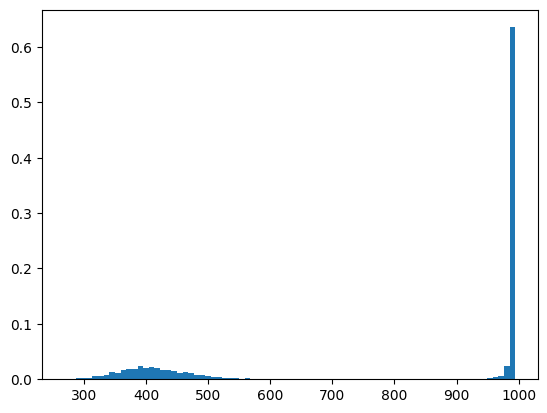

In [25]:
s_hist, s_edges = np.histogram(s_inf, density = True, bins = 80)
w_s = s_edges[1] - s_edges[0]
s_hist = s_hist * w_s
plt.bar(s_edges[:-1], s_hist, w_s)
plt.xlabel("Final Susceptible Size")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

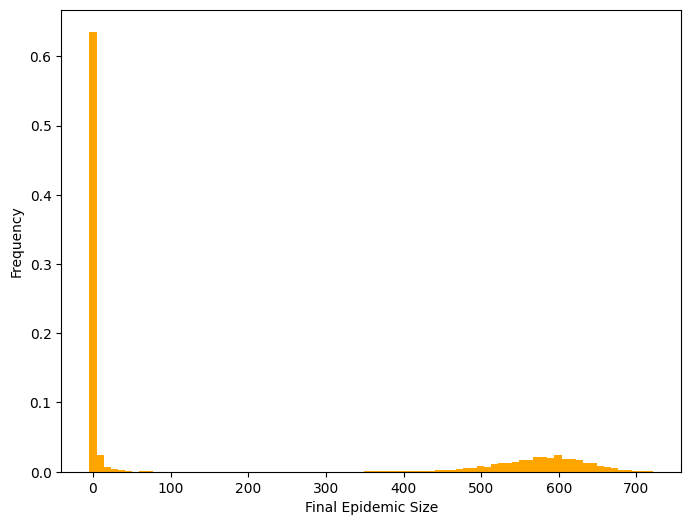

In [26]:
r_hist, r_edges = np.histogram(r_inf, density = True, bins = 80)
w_r = r_edges[1] - r_edges[0]
r_hist = r_hist * w_r
plt.figure(figsize=(8, 6))
plt.plot(facecolor = "white")
plt.bar(r_edges[:-1], r_hist, w_r, color = "orange")
plt.xlabel("Final Epidemic Size")
plt.ylabel("Frequency")

#plt.savefig("fin_epi_big")

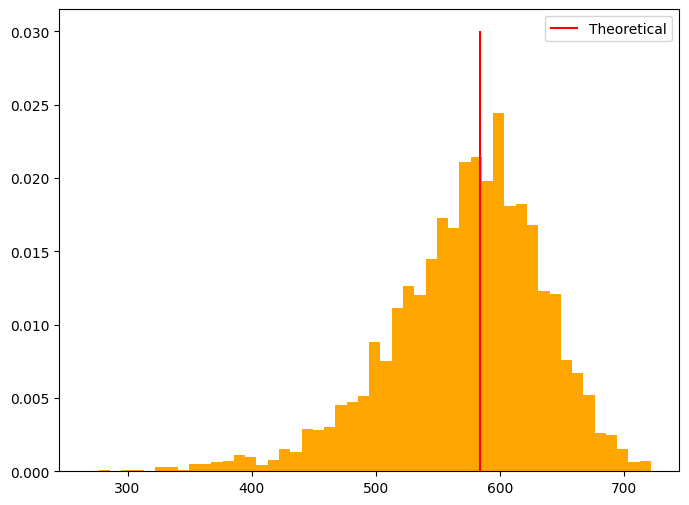

In [27]:
plt.figure(figsize=(8, 6))
plt.bar(r_edges[30:-1], r_hist[30:], w_r, color = "orange")
plt.vlines(theo_R_inf, 0, 0.03, color = "red", label = "Theoretical")
plt.legend()
#plt.savefig("fin_epi_small")